# SAM Pipeline Demo
This notebook demonstrates how to use the SamMaskProcessor class.

## #Test cuda 

In [1]:
import torch
import os
import platform

def print_env_info():
    print("=" * 60)
    print("🔧 SYSTEM INFO")
    print(f"OS: {platform.system()} {platform.release()}")
    print(f"Python: {platform.python_version()}")
    print(f"PyTorch: {torch.__version__}")
    print(f"CUDA available: {torch.cuda.is_available()}")
    print(f"CUDA version: {torch.version.cuda}")
    print(f"cuDNN version: {torch.backends.cudnn.version()}")
    print(f"GPU count: {torch.cuda.device_count()}")
    if torch.cuda.is_available():
        for i in range(torch.cuda.device_count()):
            print(f"  - GPU {i}: {torch.cuda.get_device_name(i)}")

    print("=" * 60)
    

# Call this once at the top of your notebook or script
print_env_info()


🔧 SYSTEM INFO
OS: Windows 10
Python: 3.8.8
PyTorch: 2.4.0+cu118
CUDA available: True
CUDA version: 11.8
cuDNN version: 90100
GPU count: 1
  - GPU 0: NVIDIA GeForce RTX 4080


## 1. Import the Module

In [2]:
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator
from sam_image_utils import SamMaskProcessor

import numpy as np
import pickle
import matplotlib.pyplot as plt

## 2. Initialize Processor

In [3]:
# Load model and move to CUDA
sam = sam_model_registry["vit_h"](checkpoint="C:/Users/danielkh/jupyter_lab_env/sam_vit_h_4b8939.pth")
sam.to("cuda")

# Create the mask generator
mask_generator = SamAutomaticMaskGenerator(sam)

# Initialize the processor (no change here)
processor = SamMaskProcessor(mask_generator)

c:\users\danielkh\jupyter_lab_env\jupyterlab_env\lib\site-packages\segment_anything\build_sam.py:105: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(f

[INFO] SAM Mask Processor using device: cuda


## 3. Load Image Stack from .prz File

In [4]:
# Load your .prz image stack
image_stack = processor.load_prz_data("X:/ThinFilms/Benchmarks/Filter/240521-NaPhi1-remeasure-tilt/NBED-007b/DataCube_0.prz")

## 4. Generate and Sort Masks

In [ ]:
# Process images and get masks
masks = processor.get_masks_list(image_stack)

In [ ]:
# with open("./masks.pkl", "wb") as f:
#     pickle.dump(masks, f)


In [5]:
with open("masks.pkl", "rb") as f:
    masks = pickle.load(f)
masks = np.array(masks)

## 5. Filter Masks Based on Shape and Size

In [6]:
filtered_masks = [processor.filter_masks(mask) for mask in masks]


## 6. Visualize or Save Masks

In [7]:
import matplotlib.pyplot as plt

In [8]:
import numpy as np

def extract_line_angles(filtered_masks):
    """
    Returns an array (len = number of images), each entry is the min/max/mean line angle or NaN if none.
    """
    angles_array = np.full(len(filtered_masks), np.nan)

    for i, mask_list in enumerate(filtered_masks):
        if not mask_list or not isinstance(mask_list, list):
            continue  # No valid masks
        
        angles = [m['angle'] for m in mask_list if 'angle' in m]
        if not angles:
            continue

        angles_array[i] = np.min(angles)
        # elif method == 'max':
        #     angles_array[i] = np.max(angles)
        # elif method == 'mean':
        #     angles_array[i] = np.mean(angles)

    return angles_array



In [9]:
line_angle_array = extract_line_angles(filtered_masks)

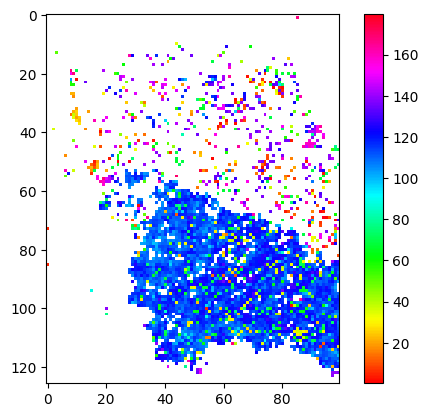

In [26]:
plt.imshow(line_angle_array.reshape(126,100),cmap="hsv",interpolation="nearest")
plt.colorbar()